In [1]:
from census import Census
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [2]:
gender_df = pd.read_csv('data_by_year.csv')
gender_df.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


In [3]:
artist_df = pd.read_csv('data.csv')
artist_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [5]:
year_df = artist_df.loc[(artist_df['year'] == 1929) | (artist_df['year'] == 1930) | (artist_df['year'] == 1931) | (artist_df['year'] == 1932) | (artist_df['year'] == 1933)]

In [6]:
grouped_df = year_df.groupby(['year'])['id'].count()

In [8]:
grouped_df

year
1929     951
1930    1886
1931     968
1932     782
1933     702
Name: id, dtype: int64

<AxesSubplot:xlabel='year'>

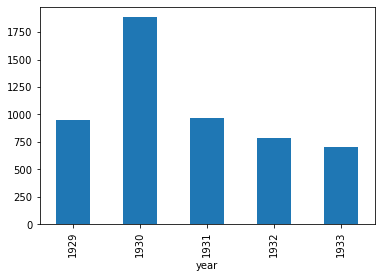

In [9]:
grouped_df.plot(kind='bar',x='year')

In [11]:
year1929_df = artist_df.loc[artist_df['year'] == 1929].sort_values(['popularity'],ascending=False)
year1929_df_top = year1929_df.head(500)
year1929_df_top.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.622236,0.641031,1.726732e+05,0.241766,0.422000,0.221989,5.442000,0.238370,-16.514352,0.692000,0.598000,0.462695,113.071814,0.625135,1929.0
std,0.420592,0.139115,1.040986e+05,0.106629,0.494373,0.337207,3.698377,0.158117,4.657436,0.462129,3.375676,0.407690,29.984456,0.198863,0.0
min,0.006560,0.091200,6.221200e+04,0.022100,0.000000,0.000000,0.000000,0.044400,-28.491000,0.000000,0.000000,0.032100,48.842000,0.033800,1929.0
25%,0.112025,0.616000,1.186500e+05,0.180000,0.000000,0.000000,2.000000,0.114000,-19.828750,0.000000,0.000000,0.071700,87.514500,0.542000,1929.0
50%,0.952000,0.683000,1.610000e+05,0.236500,0.000000,0.000009,6.000000,0.178500,-17.571000,1.000000,0.000000,0.198000,115.346500,0.646000,1929.0
75%,0.991000,0.721000,1.869235e+05,0.283000,1.000000,0.422000,9.000000,0.336250,-13.041000,1.000000,0.000000,0.925000,126.913750,0.767250,1929.0
max,0.996000,0.872000,1.450347e+06,0.912000,1.000000,0.970000,11.000000,0.964000,-2.969000,1.000000,51.000000,0.965000,214.621000,0.973000,1929.0


In [12]:
year1930_df = artist_df.loc[artist_df['year'] == 1930].sort_values(['popularity'],ascending=False)
year1930_df_top = year1930_df.head(500)
year1930_df_top.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.0
mean,0.929971,0.528714,2.041455e+05,0.296558,0.002000,0.330117,5.222000,0.206475,-14.115282,0.708000,3.21000,0.091156,110.664970,0.563805,1930.0
std,0.160611,0.156495,1.134358e+05,0.188072,0.044721,0.387195,3.275083,0.161128,6.281145,0.455138,5.39185,0.120417,30.237645,0.252834,0.0
min,0.000142,0.101000,3.913700e+04,0.003840,0.000000,0.000000,0.000000,0.037600,-40.680000,0.000000,0.00000,0.025800,48.684000,0.034900,1930.0
25%,0.951750,0.403000,1.679882e+05,0.158500,0.000000,0.000280,2.000000,0.108000,-18.040750,0.000000,0.00000,0.040800,88.247750,0.376000,1930.0
50%,0.984000,0.534000,1.842200e+05,0.280000,0.000000,0.064500,5.000000,0.142000,-12.873500,1.000000,1.00000,0.054050,108.315500,0.597500,1930.0
75%,0.993000,0.659500,2.029708e+05,0.412500,0.000000,0.819000,8.000000,0.263000,-9.777000,1.000000,4.00000,0.084200,126.375750,0.766000,1930.0
max,0.996000,0.882000,1.803280e+06,0.988000,1.000000,0.962000,11.000000,0.969000,0.523000,1.000000,47.00000,0.963000,211.253000,0.971000,1930.0


In [13]:
year1931_df = artist_df.loc[artist_df['year'] == 1931].sort_values(['popularity'],ascending=False)
year1931_df_top = year1931_df.head(500)
year1931_df_top.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.831637,0.588856,173107.942000,0.241997,0.292000,0.225860,5.040000,0.232384,-16.322438,0.682000,0.428000,0.434989,109.302904,0.513438,1931.0
std,0.191961,0.170439,85799.309618,0.124080,0.455138,0.357898,3.440651,0.156356,4.853929,0.466166,1.858959,0.429925,31.027752,0.223084,0.0
min,0.080600,0.078200,25893.000000,0.006460,0.000000,0.000000,0.000000,0.031800,-35.176000,0.000000,0.000000,0.027100,35.984000,0.038700,1931.0
25%,0.718500,0.446000,128500.000000,0.173000,0.000000,0.000000,2.000000,0.129000,-19.431750,0.000000,0.000000,0.049775,83.819500,0.354000,1931.0
50%,0.935500,0.656500,158716.500000,0.220000,0.000000,0.000133,5.000000,0.180500,-16.836000,1.000000,0.000000,0.128500,110.556500,0.489000,1931.0
75%,0.987000,0.716000,190460.500000,0.287000,1.000000,0.488000,8.000000,0.302000,-13.678500,1.000000,0.000000,0.952000,127.387250,0.677250,1931.0
max,0.996000,0.892000,824208.000000,0.867000,1.000000,0.972000,11.000000,0.934000,-4.278000,1.000000,18.000000,0.970000,217.032000,0.971000,1931.0


In [14]:
year1932_df = artist_df.loc[artist_df['year'] == 1932].sort_values(['popularity'],ascending=False)
year1932_df_top = year1932_df.head(500)
year1932_df_top.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,5.000000e+02,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.796356,0.590593,1.798479e+05,0.266896,0.0,0.162497,4.538000,0.214241,-16.421418,0.738000,2.790000,0.375615,110.712488,0.591536,1932.0
std,0.240840,0.144599,1.422312e+05,0.150683,0.0,0.299298,3.448527,0.144744,5.381232,0.440163,6.723713,0.412611,33.868833,0.210257,0.0
min,0.124000,0.064400,4.297300e+04,0.017500,0.0,0.000000,0.000000,0.047300,-37.943000,0.000000,0.000000,0.026500,44.233000,0.034700,1932.0
25%,0.568250,0.490250,1.376038e+05,0.174750,0.0,0.000001,1.000000,0.118000,-21.595250,0.000000,0.000000,0.049575,83.508000,0.461000,1932.0
50%,0.941500,0.623000,1.709925e+05,0.233000,0.0,0.000228,5.000000,0.167500,-16.012000,1.000000,0.000000,0.083800,107.855000,0.610500,1932.0
75%,0.982000,0.704000,1.894442e+05,0.310250,0.0,0.119500,7.000000,0.270500,-12.377000,1.000000,2.000000,0.948250,127.713750,0.744500,1932.0
max,0.996000,0.890000,3.093226e+06,0.913000,0.0,0.978000,11.000000,0.875000,-3.702000,1.000000,39.000000,0.967000,207.370000,0.965000,1932.0


In [16]:
year1933_df = artist_df.loc[artist_df['year'] == 1933].sort_values(['popularity'],ascending=False)
year1933_df_top = year1933_df.head(500)
year1933_df_top.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,0.890253,0.569247,192577.338000,0.276801,0.004000,0.161104,5.274000,0.206774,-12.611928,0.684000,9.650000,0.083093,111.040816,0.579893,1933.0
std,0.174708,0.177032,66729.489715,0.177350,0.063182,0.315188,3.352223,0.148584,3.345976,0.465379,10.131179,0.086046,28.500444,0.249424,0.0
min,0.000124,0.062300,64000.000000,0.016600,0.000000,0.000000,0.000000,0.025100,-32.601000,0.000000,0.000000,0.030400,33.944000,0.035900,1933.0
25%,0.890750,0.505750,165770.000000,0.151750,0.000000,0.000004,2.000000,0.110750,-14.179000,0.000000,0.000000,0.039575,89.144000,0.403000,1933.0
50%,0.953000,0.606500,178420.000000,0.240500,0.000000,0.000309,5.000000,0.156000,-12.401000,1.000000,9.000000,0.048650,108.563500,0.613500,1933.0
75%,0.983000,0.690000,191227.000000,0.339000,0.000000,0.058800,8.000000,0.261500,-10.622750,1.000000,14.000000,0.076200,130.232750,0.771750,1933.0
max,0.996000,0.829000,621191.000000,0.953000,1.000000,0.984000,11.000000,0.954000,-4.425000,1.000000,63.000000,0.561000,205.485000,0.971000,1933.0


In [17]:

great_depression_df = pd.DataFrame({
    'Year 1929':year1929_df_top.describe().transpose()['mean'],
    'Year 1930':year1930_df_top.describe().transpose()['mean'],
    'Year 1931':year1931_df_top.describe().transpose()['mean'],
    'Year 1932':year1932_df_top.describe().transpose()['mean'],
    'Year 1933':year1933_df_top.describe().transpose()['mean']
})

In [19]:
transposed_great_depression_df = great_depression_df.transpose().reset_index().sort_values('index')
transposed_great_depression_df

,index,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,Year 1929,0.622236,0.641031,172673.224,0.241766,0.422,0.221989,5.442,0.238370,-16.514352,0.692,0.598,0.462695,113.071814,0.625135,1929.0
1,Year 1930,0.929971,0.528714,204145.498,0.296558,0.002,0.330117,5.222,0.206475,-14.115282,0.708,3.210,0.091156,110.664970,0.563805,1930.0
2,Year 1931,0.831637,0.588856,173107.942,0.241997,0.292,0.225860,5.040,0.232384,-16.322438,0.682,0.428,0.434989,109.302904,0.513438,1931.0
3,Year 1932,0.796356,0.590593,179847.868,0.266896,0.000,0.162497,4.538,0.214241,-16.421418,0.738,2.790,0.375615,110.712488,0.591536,1932.0
4,Year 1933,0.890253,0.569247,192577.338,0.276801,0.004,0.161104,5.274,0.206774,-12.611928,0.684,9.650,0.083093,111.040816,0.579893,1933.0


<AxesSubplot:xlabel='index'>

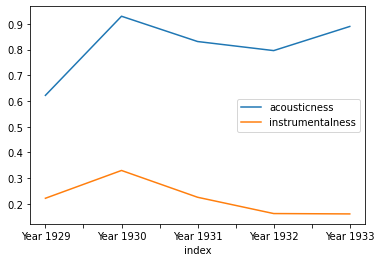

In [22]:
transposed_great_depression_df.plot(kind='line', x = 'index', y = ['acousticness','instrumentalness'])

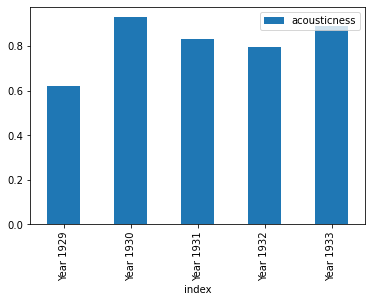

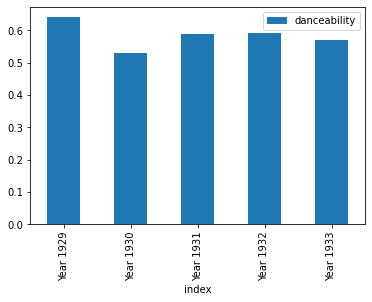

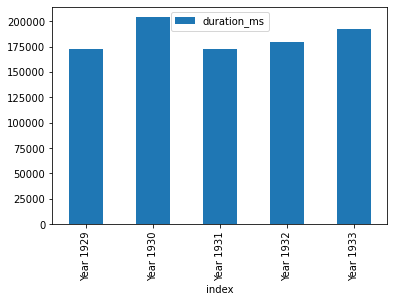

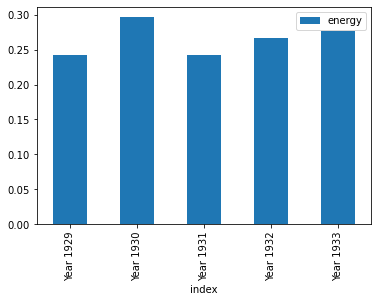

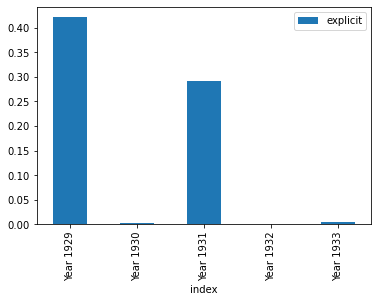

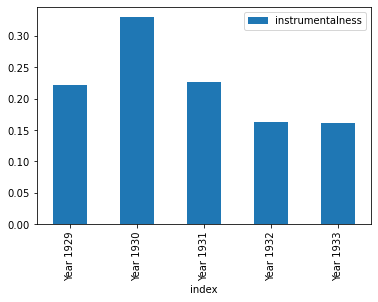

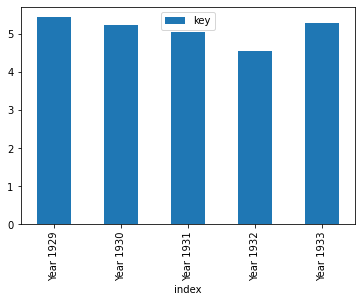

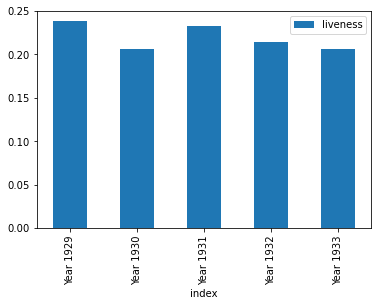

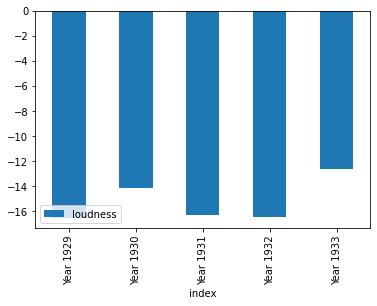

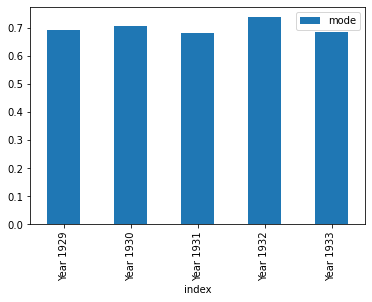

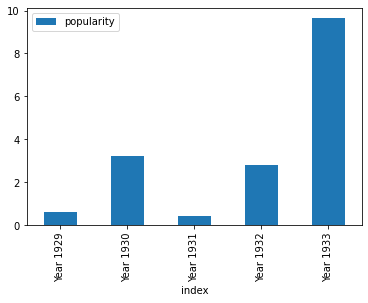

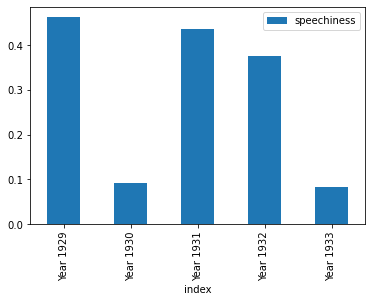

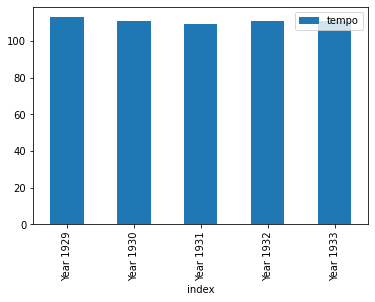

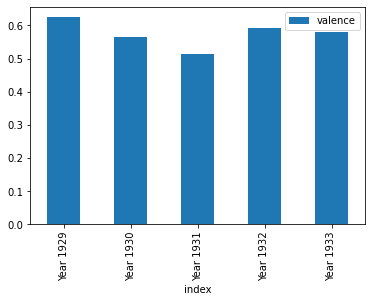

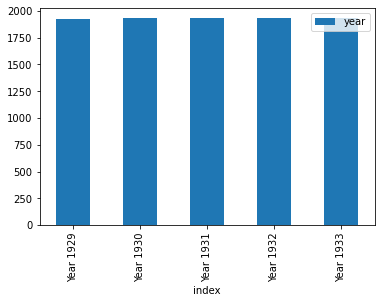

In [24]:
transposed_great_depression_column_list = transposed_great_depression_df.columns[1:]
for i in transposed_great_depression_column_list:
    transposed_great_depression_df.plot(kind = 'bar', x = 'index', y = i)